# Preparing Data

## General


In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pymer4 as pymer4
from statannot import add_stat_annotation

In [2]:
p = 'data/'

# Temporal Binding



## prep
### load data

In [3]:
# load data
behavior_raw = pd.read_csv( p + 'PI_results_design.csv')
# set data types
behavior_raw[['ed','rt']] = behavior_raw[['ed','rt']].apply(pd.to_numeric, axis=1)
behavior_raw['rd'] = behavior_raw['rd'].astype("string")  # needs to be string before category for R conversion
behavior_raw[['rd','condition']] = behavior_raw[['rd','condition']].astype("category")

# delete VP 18 (did not follow instructions in block 3)
behavior_raw =  behavior_raw.loc[behavior_raw["id"] !=18]

### check raw data (rection times and estimated times)


(0.0, 5.0)

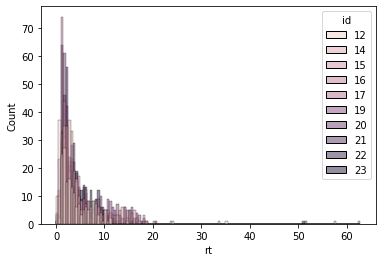

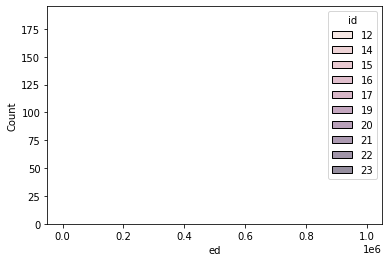

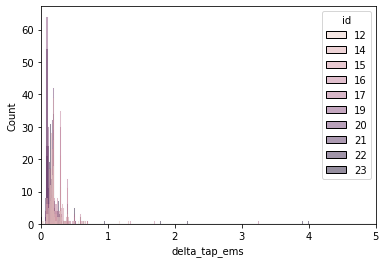

In [4]:
fig, ax = plt.subplots()
hist = sns.histplot(behavior_raw, x = 'rt',ax =ax, hue = 'id')
#ax.set_xlim(0,5) # remove outliers for visualization

fig, ax = plt.subplots()
hist = sns.histplot(behavior_raw, x = 'ed',ax =ax, hue = 'id')

fig, ax = plt.subplots()
hist = sns.histplot(behavior_raw, x = 'delta_tap_ems',ax =ax, hue = 'id')
ax.set_xlim(0,5) # remove outliers for visualization

### clean data

In [5]:
# removes outliers trials that have outliers either in rt or ed
cols = ['rt', 'ed', 'delta_tap_ems'] # relevant cols

# calculate quantiles and IQR
Q1 = behavior_raw[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = behavior_raw[cols].quantile(0.75)
IQR = Q3 - Q1

# return a boolean array of the rows with (any) non-outlier column values
condition = ~((behavior_raw[cols] < (Q1 - 3 * IQR)) | (behavior_raw[cols] > (Q3 + 3 * IQR))).any(axis=1)

# filter our dataframe based on condition
behavior = behavior_raw[condition]
behavior_del = behavior_raw[-condition]

In [6]:
# check outlier removel

#count deleted trials
print('Deleted trials:',len(behavior_del))

#per pID
print('Deleted trials per pID')
print(behavior_del['id'].value_counts())

print('mean')
print(behavior_del['id'].value_counts().mean())
print('sd')
print(behavior_del['id'].value_counts().std())

#per condition
print('Deleted trials per condition')
print(behavior_del['condition'].value_counts())
print('mean')
print(behavior_del['condition'].value_counts().mean())
print('sd')
print(behavior_del['condition'].value_counts().std())

print(len(behavior))

Deleted trials: 110
Deleted trials per pID
id
15    28
19    25
23    16
16    12
17     9
12     8
14     6
20     3
22     3
Name: count, dtype: int64
mean
12.222222222222221
sd
9.107384061542835
Deleted trials per condition
condition
ems_random    57
ems_bci       30
baseline      23
Name: count, dtype: int64
mean
36.666666666666664
sd
17.95364401266031
2140


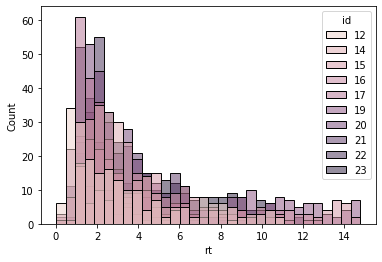

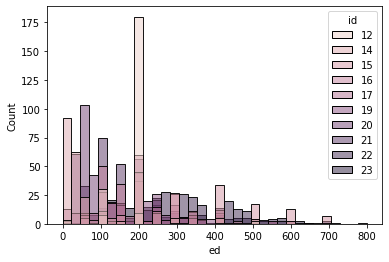

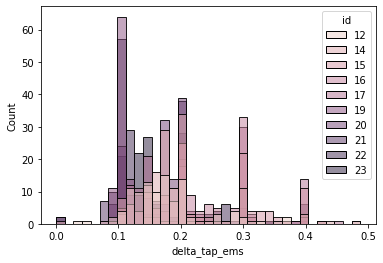

In [7]:
#check cleaned data

fig, ax = plt.subplots()
hist = sns.histplot(behavior, x = 'rt',ax =ax, hue = 'id')
#ax.set_xlim(0,5) # remove outliers for visualization

fig, ax = plt.subplots()
hist = sns.histplot(behavior, x = 'ed',ax =ax, hue = 'id')

fig, ax = plt.subplots()
hist = sns.histplot(behavior, x = 'delta_tap_ems',ax =ax, hue = 'id')


## plot
### prep plot

In [8]:
# with stimulation condition + time condition+ rd as y
behavior[['rd']] = behavior[['rd']].apply(pd.to_numeric, axis=1)
behavior[['ed']] = behavior[['ed']].apply(pd.to_numeric, axis=1)
# diff = ed - 350 because 350 is the mean of the different time intervals; maybe add *-1  to adapt direction of the plot
behavior["diff"]= behavior['ed']
behavior[['rd']] = behavior[['rd']].astype("category")

behavior_means = behavior.groupby(['id','condition'],as_index=False)['diff'].mean()

palette = ['#576683', '#E4f392', '#337775']
cats= ['baseline','ems_random','ems_bci'] 
ylabel = 'ed -350'
xlabel = 'condition'
title = 'temporal_binding'
data = behavior
data_means = behavior_means
y = 'diff'
x = "condition"
hue = "id"
hue2 = 'rd'

/var/folders/04/2q4w_vgn0_7dtkxyll6j2gx40000gn/T/ipykernel_10914/3625791261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior[['rd']] = behavior[['rd']].apply(pd.to_numeric, axis=1)
/var/folders/04/2q4w_vgn0_7dtkxyll6j2gx40000gn/T/ipykernel_10914/3625791261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior[['ed']] = behavior[['ed']].apply(pd.to_numeric, axis=1)
/var/folders/04/2q4w_vgn0_7dtkxyll6j2gx40000gn/T/ipykernel_10914/3625791261.py:5: SettingWithCopyWarning: 
A value is trying t

### plot

/var/folders/04/2q4w_vgn0_7dtkxyll6j2gx40000gn/T/ipykernel_10914/1215968944.py:26: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data = data_means, x = x, y = y,hue = hue, palette = sns.color_palette(['black'],8),legend = False,alpha=0.4)


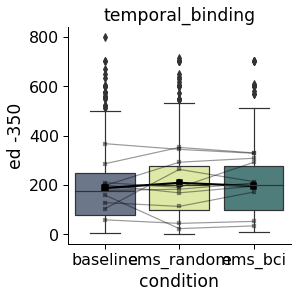

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FileNotFoundError: [Errno 2] No such file or directory: 'results/temporal_binding_.eps'

In [9]:
# runs plot but needs post processing in affinty desiger
cats_0 = data[data[x]==cats[0]]
cats_1 = data[data[x]==cats[1]]
cats_2 = data[data[x]==cats[2]]

pairs = [(cats[0], cats[1],cats[2])]

with sns.plotting_context('paper', font_scale = 1.8):

    ### Create new plot
    fig, ax = plt.subplots(1, 1, figsize=(4,4))
    fig.patch.set_alpha(1)

    sns.despine() #bottom=True, left=True

        # show boxplots
    ax = sns.boxplot(data = data,x = x, y = y,  order= ['baseline','ems_random','ems_bci'] ,  palette= palette )
    for patch in ax.patches: # adapt alpha
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .9))

    # show line connecting means
    ax =  sns.pointplot(data = data,x = x, y = y, markers="s" ,color = 'black', order = cats)
    
     #  show lines connecting pid means observations    
    ax = sns.lineplot(data = data_means, x = x, y = y,hue = hue, palette = sns.color_palette(['black'],8),legend = False,alpha=0.4)
    
    ax = sns.scatterplot(data=data_means, x=x, y=y,s=10, legend= True, marker="s",color = 'black',edgecolor = 'black',alpha=0.4)
        
    # ax.invert_yaxis()
    # add_stat_annotation(ax, data=data_means, x=x, y=y, box_pairs=[("baseline", "ems_random"), ("baseline", "ems_bci"), ('ems_random', 'ems_bci')], test='t-test_paired', text_format='star', loc='outside', verbose=2)

    handles, labels = ax.get_legend_handles_labels()  
    
    #plt.legend(handles[3:6],labels[3:6],frameon=True,loc = 'upper left',labelspacing =0.3)
    
    # label_plot_for_subcats(ax)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    
    plt.show()

fig.savefig('results/'+title + '_'+'.eps', format='eps', transparent=True, bbox_inches='tight', dpi=300)
fig.savefig('results/'+title + '_'+'.svg', format='svg', transparent=True, bbox_inches='tight', dpi=300)
fig.savefig('results/'+title + '_' +'.png', format='png', transparent=True, bbox_inches='tight', dpi=300)

## anaysis


### descriptive

In [10]:
print(behavior.groupby('condition')['ed'].agg(['mean','std']))

                  mean         std
condition                         
baseline    187.554333  138.929693
ems_bci     195.979138  138.208467
ems_random  208.592486  140.084898


### LMM

#### prep
- switched from rpy2 to pymer4, because it is less annoying with importing / exporting from python to R
- not sure if of this is still necessary, but since pymer4 is based on rpy2, this might be the case

In [ ]:
# packnames = ('lme4', 'lmerTest', 'emmeans', 'geepack', 'sjPlot')
# from rpy2.robjects.packages import importr
# from rpy2.robjects.vectors import StrVector
# utils = importr("utils")
# utils.chooseCRANmirror(ind=1)

In [ ]:
# packnames = ('lme4', 'lmerTest', 'emmeans', 'geepack', 'sjPlot', 'Matrix')
# from rpy2.robjects.vectors import StrVector
# utils.install_packages(StrVector(packnames))

#### built models

In [12]:
from pymer4.models import Lmer

In [14]:
# full model
full_model = Lmer("diff ~ condition * rd + (condition|id) + (rd|id)", data = behavior)
display(full_model.fit(REML = False, factors={"condition": ["baseline", "ems_random", "ems_bci"]}))
# full_model.plot_summary()

/opt/homebrew/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "rd". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  warnings.warn('Error while trying to convert '


boundary (singular) fit: see help('isSingular') 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: diff~condition*rd+(condition|id)+(rd|id)

Family: gaussian	 Inference: parametric

Number of observations: 2140	 Groups: {'id': 10.0}

Log-likelihood: -12602.963 	 AIC: 25249.926

Random effects:

                         Name       Var     Std
id                (Intercept)   991.776  31.492
id           conditionems_bci  5635.625  75.071
id        conditionems_random  4508.458  67.145
id.1              (Intercept)  5044.150  71.022
id.1                    rd350   813.309  28.519
id.1                    rd500  4787.312  69.190
Residual                       7242.160  85.101

                

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),126.423,77.095,175.751,25.168,9.019,5.023,0.001,***
condition1,38.515,-10.424,87.453,24.969,11.409,1.542,0.150,
condition2,42.384,-1.952,86.721,22.621,11.807,1.874,0.086,.
rd350,65.180,41.898,88.462,11.879,19.908,5.487,0.000,***
rd500,123.496,78.013,168.979,23.206,11.616,5.322,0.000,***
condition1:rd350,-41.275,-62.760,-19.789,10.962,2097.946,-3.765,0.000,***
condition2:rd350,-20.244,-41.929,1.442,11.064,2098.477,-1.830,0.067,.
condition1:rd500,-49.999,-71.488,-28.510,10.964,2098.020,-4.560,0.000,***
condition2:rd500,-30.650,-52.356,-8.944,11.075,2098.838,-2.768,0.006,**



#### define null models

In [ ]:
# null model without stimulation condition 
null_model = Lmer("diff ~ (condition|id)", data = behavior)
null_model.fit(REML = False, summarize=False)

#### likelihood ratio tests

stimulation condition

In [ ]:
pymer4.stats.lrt([null_model,full_model])

#### post hoc test

In [ ]:
# post hoc test condition
marginal_estimates, comparisons = full_model.post_hoc(
    marginal_vars="condition", p_adjust = "bonf")
print(comparisons)

# 3. subjective data



In [ ]:
questionaire = pd.read_excel(p + 'questionaire.xlsx') 

good_pid = ['12', '14', '15', '16', '17', '19', '20', '21', '22', '23']
questionaire['pID'] = questionaire['pID'].astype(str)
questionaire = questionaire.loc[questionaire['pID'].isin(good_pid)]
questionaire_long = questionaire.melt(id_vars= ['pID'],value_vars=['baseline','passive','agency'])

### plot control

In [ ]:
palette = ['#576683', '#E4f392', '#337775']
cats= ['item_baseline', 'item_passive', 'item_agency']
ylabel = 'level of control'
xlabel = 'condition'
title = 'subjective control rating'
data = questionaire_long
y = 'value'
x = 'variable'
hue = 'pID'

In [ ]:
with sns.plotting_context('paper', font_scale = 1.8):

        ### Create new plot
        fig, ax = plt.subplots(1, 1, figsize=(4,4))
        fig.patch.set_alpha(1)

        sns.despine() #bottom=True, left=True
         # show boxplots
        ax = sns.boxplot(data = data, x = x, y = y,  palette= palette)
        for patch in ax.patches: # adapt alpha
             r, g, b, a = patch.get_facecolor()
             patch.set_facecolor((r, g, b, .9))

                   
        # show line connecting means
        sns.pointplot(
            data = data,x = x, y = y, markers="s", color = 'black')
        
        # pId means
        
        ax = sns.lineplot(data = data, x = x, y = y,hue = hue, palette = sns.color_palette(['black'],8),legend = False,alpha=0.4)
    
        ax = sns.scatterplot(data=data, x=x, y=y,s=10, legend= True, marker="s",color = 'black',edgecolor = 'black',alpha=0.4)

        #sns.scatterplot(data = data,x = x, y = y, markers="^",color = 'black')
        # add_stat_annotation(ax, data=data, x=x, y=y, box_pairs=[("baseline", "passive"), ("baseline", "agency"), ('passive', 'agency')], test='t-test_ind', text_format='star', loc='outside', verbose=2)
        
        # Label and show
        # label_plot_for_subcats(ax)
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)

        plt.show()
        fig.savefig('results/'+title + '_' +'.svg', format='svg', transparent=True, bbox_inches='tight', dpi=300)
        fig.savefig('results/'+title + '_' +'.png', format='png', transparent=True, bbox_inches='tight', dpi=300)
        fig.savefig('results/'+title + '_'+'.eps', format='eps', transparent=True, bbox_inches='tight', dpi=300)

#### LME


In [ ]:
#full model
full_model = Lmer('value ~ variable + (1|pID)', data = questionaire_long)
display(full_model.fit(REML = False,factors={"variable": ["baseline", "passive", "agency"]}))

In [ ]:
#null model
null_model = Lmer('value ~ (1|pID)', data = questionaire_long)
null_model.fit(REML = False, summarize=False)

In [ ]:
# liklyhood ratio test
pymer4.stats.lrt([null_model,full_model])

In [ ]:
# post hoc test condition
marginal_estimates, comparisons = full_model.post_hoc(
    marginal_vars="variable",p_adjust = "bonf")

print(comparisons)

In [ ]:
# participants
print(questionaire.age.mean())
print(questionaire.age.std())

# Plot EEG

In [ ]:
slope = pd.read_csv( p + 'PI_results_design_slope_processed.csv')
#data cleaning happend somewhere else

In [ ]:
palette = ['#576683', '#337775']
cats= ['idle', 'pre_move']
ylabel = 'slope'
xlabel = 'condition'
title = 'slope'
data = slope
y = 'slopes'
x = 'condition'
hue = 'id'

In [ ]:
# plot a box plot of the slope values by condition
#slope.boxplot(column=['slopes'], by=['condition'], figsize=(12,8))

with sns.plotting_context('paper', font_scale = 1.8):

        ### Create new plot
        fig, ax = plt.subplots(1, 1, figsize=(3,4))
        fig.patch.set_alpha(1)

        sns.despine() #bottom=True, left=True
         # show boxplots
        ax = sns.boxplot(data = data, x = x, y = y,  palette= palette)
        for patch in ax.patches: # adapt alpha
             r, g, b, a = patch.get_facecolor()
             patch.set_facecolor((r, g, b, .9))

                   
        # show line connecting means
        sns.pointplot(data = data,x = x, y = y, markers="s" ,color = 'black')
        
        # pId means
        
        ax = sns.lineplot(data = data, x = x, y = y,hue = hue, palette = sns.color_palette(['black'],8),legend = False,alpha=0.4)
    
        ax = sns.scatterplot(data=data, x=x, y=y,s=10, legend= True, marker="s",color = 'black',edgecolor = 'black',alpha=0.4)

        #sns.scatterplot(data = data,x = x, y = y, markers="^",color = 'black')

        plt.gca().invert_yaxis()

        # add statannotation for the pair 'idle' and 'pre_move'
        add_stat_annotation(ax, data=data, x=x, y=y, box_pairs=[("idle", "pre_move")], test='t-test_ind', text_format='star', loc='outside', verbose=2)
        

        # Label and show
        # label_plot_for_subcats(ax)
        # ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)

      

        plt.show()
        fig.savefig('results/'+title + '_' +'.svg', format='svg', transparent=True, bbox_inches='tight', dpi=300)
        fig.savefig('results/'+title + '_' +'.eps', format='eps', transparent=True, bbox_inches='tight', dpi=300)
        fig.savefig('results/'+title + '_' +'.png', format='png', transparent=True, bbox_inches='tight', dpi=300)

In [ ]:
stats.ttest_ind(slope['slopes'][slope['condition'] == 'idle'], slope['slopes'][slope['condition'] == 'pre_move'])